# Base de classification finale

In [1]:
import pandas as pd
import numpy as np
from numpy import around
np.set_printoptions(suppress=True)  # supprime notation exp
import copy

C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_decomposition import PLSRegression
lr = LinearRegression()
pls = PLSRegression()
etr = ExtraTreesRegressor()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [3]:
# Il faut à chaque fois 2 colonnes Overall (arrondi) et Overall2
francais = pd.read_csv('dataset_french.csv')
turc = pd.read_csv('dataset_turc.csv')
allemand = pd.read_csv('dataset_german.csv')
anglais = pd.read_csv('dataset_anglais.csv')
spanish = pd.read_csv('dataset_spanish.csv')  
arab = pd.read_csv('dataset_arab.csv')

In [4]:
final_francais = pd.read_csv('eval_fr_notes.csv',index_col=0)
final_turc = pd.read_csv('eval_tr_notes.csv',index_col=0)
final_de = pd.read_csv('eval_de_notes.csv',index_col=0)
final_compl_allemand = pd.read_csv('eval_compl_de_notes.csv',index_col=0)
final_en = pd.read_csv('eval_en_notes.csv',index_col=0)
final_de_en = pd.read_csv('eval_de_en_notes.csv',index_col=0)
final_zh = pd.read_csv('eval_zh_notes.csv',index_col=0)
final_pl = pd.read_csv('eval_pl_notes.csv',index_col=0)
final_es_en = pd.read_csv('eval_es_en_notes.csv',index_col=0)
final_zh_en = pd.read_csv('eval_zh_en_notes.csv',index_col=0)
#final_ru = pd.read_csv('eval_ru_notes.csv',index_col=0)   # annulé, pas bon
final_it = pd.read_csv('eval_it_en_notes_deepl.csv',index_col=0) 
final_es = pd.read_csv('eval_es_notes.csv',index_col=0)
final_es_it = pd.read_csv('eval_es_it_notes.csv',index_col=0)
final_ar = pd.read_csv('eval_ar_notes.csv',index_col=0)
# google
autres_langues = pd.read_csv('eval_autres_langues_notes.csv',index_col=0)
# google italien
it_google = pd.read_csv('eval_it_google_notes.csv',index_col=0)
ru_google = pd.read_csv('eval_ru_google_notes.csv',index_col=0)

In [5]:
anglais.Overall2.mean()

2.894334215167546

In [6]:
traductions_en = pd.read_csv('eval_traductions_en_completes.csv').reset_index(drop=True)

In [7]:
# concatener les elements en espagnol, german et anglais
final_es = pd.concat([final_es,final_es_it],axis=0).reset_index(drop=True)
final_allemand = pd.concat([final_de,final_compl_allemand],axis=0).reset_index(drop=True)
autres_langues = pd.concat([autres_langues,it_google,ru_google],axis=0).reset_index(drop=True)

In [8]:
# uniformiser les colonnes puis concat
final_de_en = final_de_en[final_en.columns]
final_zh = final_zh[final_en.columns]
final_zh_en = final_zh_en[final_en.columns]
final_pl = final_pl[final_en.columns]
final_es_en = final_es_en[final_en.columns]
final_it = final_it[final_en.columns]
ru_google = ru_google[final_en.columns]
final_anglais = pd.concat([final_en,final_de_en,final_zh,final_pl,final_es_en,final_zh_en,final_it,ru_google],axis=0).reset_index(drop=True)

In [9]:
# Geography score
train_geo = pd.read_csv('train_geography_score.csv',index_col=0)
eval_geo = pd.read_csv('eval_geography_score.csv',index_col=0)
train_geo['ligne'] = train_geo.index
eval_geo['ligne'] = eval_geo.index

In [10]:
francais = francais.merge(train_geo,left_on='ligne',right_on = 'ligne')
turc = turc.merge(train_geo,left_on='ligne',right_on = 'ligne')
anglais = anglais.merge(train_geo,left_on='ligne',right_on = 'ligne')
allemand = allemand.merge(train_geo,left_on='ligne',right_on = 'ligne')
spanish = spanish.merge(train_geo,left_on='ligne',right_on = 'ligne')
arab = arab.merge(train_geo,left_on='ligne',right_on = 'ligne')

In [11]:
final_francais = final_francais.merge(eval_geo,left_on='ligne',right_on = 'ligne')
final_turc = final_turc.merge(eval_geo,left_on='ligne',right_on = 'ligne')
final_anglais = final_anglais.merge(eval_geo,left_on='ligne',right_on = 'ligne')
final_allemand = final_allemand.merge(eval_geo,left_on='ligne',right_on = 'ligne')
final_es = final_es.merge(eval_geo,left_on='ligne',right_on = 'ligne')
final_ar = final_ar.merge(eval_geo,left_on='ligne',right_on = 'ligne')
autres_langues = autres_langues.merge(eval_geo,left_on='ligne',right_on = 'ligne')

In [12]:
data = pd.read_csv('eval_data_prep_v1.csv')
data['ligne'] = data.index
data = data.loc[:,['ligne','pair_id','pair_lang']]

In [13]:
# vérfier les predicteurs 
predicteurs = ['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1',
    'score_similarite_resume2', 'score_classif1', 'score_classif2','score_sentiment1', 
    'score_sentiment2','meth1_similarites','meth2_similarites']

In [14]:
# vérifier les predicteurs : pour anglais et allemand
predicteurs_anglais = ['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1',
     'score_similarite_resume2', 'score_classif1', 'score_classif2','score_sentiment1', 
     'score_sentiment2', 'score_sentiment3', 'meth1_similarites','meth2_similarites']

In [15]:
predicteurs_arab = ['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1',
    'score_similarite_resume2', 'score_classif','score_sentiment', 'meth1_similarites','meth2_similarites']

In [16]:
# Fonction du programme de classiifcation tenant compte de l'ordre et basé sur les scores probas  de classification  
# si plus de 50% sur un catégorie : mettre catégorie obtenue sinon, faire la somme 1-2 et 3/4 
# et prendre le plus gros score des 2 :si ce sore > 65% alors à ce moment là prendre le plus gros de la catégorie 1 ou 2 / 3 ou 4
# sinon c'est équilibré 50-50 ou 60-40 : prendre 2 ou 3 selon que le score 1 est plus important ou l'autre
def choix_classes(score_prob):
    classe_finale = []
    for i in range(len(score_prob)):
        res = list(score_prob[i,:])
        max_res = max(res)
        if max_res > 50:
            classe_finale.append(res.index(max_res)+1)
        else:
            som1 = res[0]+res[1]
            som2 = res[2]+res[3]
            if som1 > som2:
                if som1 >= 65:
                    choix = 1 if res[0]>res[1] else 2
                else:
                    choix = 2
            else:
                if som2 >= 65:
                    choix = 4 if res[3]>res[2] else 3
                else:
                    choix = 3
            classe_finale.append(choix)
    return classe_finale

In [17]:
def decompte(df):
    # Fais le decompte des votes avec RF / RF en Probabilité - LDA et LDA Proba
    res = pd.DataFrame(columns=['RF','val1','val2','val3','val4','valfinale','stacking'])
    for i in df.index.values:
        my_dic = {}
        my_dic['RF'] = df.RF[i]
        my_dic['stacking'] = df.stacking[i]
        my_dic['valfinale'] = 0
        try:
            df.loc[i,df.columns[:4]].value_counts()[1.0]
        except:
            my_dic['val1'] = 0
        else:
            my_dic['val1'] = df.loc[i,df.columns[:4]].value_counts()[1.0]
            if my_dic['val1'] >=3:
                my_dic['valfinale']=1
        try:
            df.loc[i,df.columns[:4]].value_counts()[2.0]
        except:
            my_dic['val2'] = 0
        else:
            my_dic['val2'] = df.loc[i,df.columns[:4]].value_counts()[2.0]
            if my_dic['val2'] >=3:
                my_dic['valfinale']=2
        try:
            df.loc[i,df.columns[:4]].value_counts()[3.0]
        except:
            my_dic['val3'] = 0
        else:
            my_dic['val3'] = df.loc[i,df.columns[:4]].value_counts()[3.0]
            if my_dic['val3'] >=3:
                my_dic['valfinale']=3
        try:
            df.loc[i,df.columns[:4]].value_counts()[4.0]
        except:
            my_dic['val4'] = 0
        else:
            my_dic['val4'] = df.loc[i,df.columns[:4]].value_counts()[4.0]
            if my_dic['val4'] >=3:
                my_dic['valfinale']=4
                
        if my_dic['valfinale'] == 0:
            val1 = my_dic['val1'] + my_dic['val2']
            val2 = my_dic['val3'] + my_dic['val2']
            val3 = my_dic['val4'] + my_dic['val3'] 
            if val1 > val2 and val1 > val3:
                my_dic['valfinale'] = 1* my_dic['val1']/val1 + 2* my_dic['val2']/val1
            elif val2 > val1 and val2 > val3:
                my_dic['valfinale'] = 3*my_dic['val3']/val2 + 2*my_dic['val2']/val2
            elif val3 > val1 and val3 > val2:
                my_dic['valfinale'] = 3*my_dic['val3']/val3 + 4*my_dic['val4']/val3
            elif val1 == val2 and val1 > val3:
                my_dic['valfinale'] = 2
            elif val2 == val3 and val2 > val1:
                my_dic['valfinale'] = 3
            elif val1==val2 and val2==val3:
                my_dic['valfinale'] = 2.5           
        res.loc[len(res)] = my_dic
        
    return res       

In [18]:
def decompte2(df):
    # Fais le decompte des votes avec RF / RF en Probabilité - LDA et LDA Proba + LOGREG et LOGREG Proba
    res = pd.DataFrame(columns=['RF','val1','val2','val3','val4','valfinale','stacking'])
    for i in df.index.values:
        my_dic = {}
        my_dic['RF'] = df.RF[i]
        my_dic['stacking'] = df.stacking[i]
        my_dic['valfinale'] = 0
        try:
            df.loc[i,df.columns[:6]].value_counts()[1.0]
        except:
            my_dic['val1'] = 0
        else:
            my_dic['val1'] = df.loc[i,df.columns[:6]].value_counts()[1.0]
            if my_dic['val1'] >=4:
                my_dic['valfinale']=1
        try:
            df.loc[i,df.columns[:6]].value_counts()[2.0]
        except:
            my_dic['val2'] = 0
        else:
            my_dic['val2'] = df.loc[i,df.columns[:6]].value_counts()[2.0]
            if my_dic['val2'] >=4:
                my_dic['valfinale']=2
        try:
            df.loc[i,df.columns[:6]].value_counts()[3.0]
        except:
            my_dic['val3'] = 0
        else:
            my_dic['val3'] = df.loc[i,df.columns[:6]].value_counts()[3.0]
            if my_dic['val3'] >=4:
                my_dic['valfinale']=3
        try:
            df.loc[i,df.columns[:6]].value_counts()[4.0]
        except:
            my_dic['val4'] = 0
        else:
            my_dic['val4'] = df.loc[i,df.columns[:6]].value_counts()[4.0]
            if my_dic['val4'] >=4:
                my_dic['valfinale']=4
                
        if my_dic['valfinale'] == 0:
            val1 = my_dic['val1'] + my_dic['val2']
            val2 = my_dic['val3'] + my_dic['val2']
            val3 = my_dic['val4'] + my_dic['val3'] 
            if val1 > val2 and val1 > val3:
                my_dic['valfinale'] = 1* my_dic['val1']/val1 + 2* my_dic['val2']/val1
            elif val2 > val1 and val2 > val3:
                my_dic['valfinale'] = 3*my_dic['val3']/val2 + 2*my_dic['val2']/val2
            elif val3 > val1 and val3 > val2:
                my_dic['valfinale'] = 3*my_dic['val3']/val3 + 4*my_dic['val4']/val3
            elif val1 == val2 and val1 > val3:
                my_dic['valfinale'] = 2
            elif val2 == val3 and val2 > val1:
                my_dic['valfinale'] = 3
            elif val1==val2 and val2==val3:
                my_dic['valfinale'] = 2.5           
        res.loc[len(res)] = my_dic
        
    return res       

In [18]:
# def finalisation_note(df):
#     # choix final de notes selon résultats de classif et de régression en privilégiant Extra Trees ETR qui a la meilleur perf
#     # But est aussi de rendr eles notes le plus entières possibles sauf s'il ya doute
#     for i in range(len(df)):
#         if df.valfinale[i] == 1 and df.regression[i]<1.4 and df.ETR[i]<=1.5:
#             df.votefinal[i] = 1
#         elif df.valfinale[i] == 1 and df.regression[i]<1.4 and df.ETR[i]>1.5 and df.ETR[i]<1.9:
#             df.votefinal[i] = round((df.ETR[i]+1)/2,1)
#         elif df.valfinale[i] == 4 and df.regression[i]>3.6 and df.ETR[i]>=3.5:
#             df.votefinal[i] = 4
#         elif df.valfinale[i] == 4 and df.regression[i]>3.6 and df.ETR[i]<3.5 and df.ETR[i]>3.1:
#             df.votefinal[i] = round((df.ETR[i]+4)/2,1)
#         elif df.valfinale[i] == 2 and df.regression[i]>1.7 and df.ETR[i]>1.7 and df.regression[i]<2.3 and df.ETR[i]<2.3:
#             df.votefinal[i] = 2
#         elif df.valfinale[i] == 3 and df.regression[i]>2.7 and df.ETR[i]>2.7 and df.regression[i]<3.3 and df.ETR[i]<3.3:
#             df.votefinal[i] = 3
#         elif df.ETR[i] < 1.3 and df.valfinale[i] <= 1.5:
#             df.votefinal[i] = 1
#         elif df.ETR[i] < 2.3 and df.ETR[i] > 1.7 and df.valfinale[i] >= 1.7 and df.valfinale[i] <= 2.3:
#             df.votefinal[i] = 2
#         elif df.ETR[i] < 3.3 and df.ETR[i] > 2.7 and df.valfinale[i] >= 2.7 and df.valfinale[i] <= 3.3:
#             df.votefinal[i] = 3
#         elif df.ETR[i] > 3.6 and df.valfinale[i] >= 3.5:
#             df.votefinal[i] = 4
#         else:
#             df.votefinal[i] = round(df.votefinal[i],1)
#     return df

In [67]:
# DERNIER ESSAI PLUS ARRONDI
def finalisation_note(df):
    # choix final de notes selon résultats de classif et de régression en privilégiant Extra Trees ETR qui a la meilleur perf
    # But est aussi de rendre les notes le plus entières possibles sauf s'il ya doute
    for i in range(len(df)):
        if df.valfinale[i] == 1 and df.regression[i]<1.6 and df.ETR[i]<=1.6:
            df.votefinal[i] = 1.0
        elif df.valfinale[i] == 1 and df.regression[i]<1.6 and df.ETR[i]>1.5 and df.ETR[i]<2:
            df.votefinal[i] = round((df.ETR[i]+1)/2,1)
        elif df.valfinale[i] == 4 and df.regression[i]>3.4 and df.ETR[i]>=3.4:
            df.votefinal[i] = 4.0
        elif df.valfinale[i] == 4 and df.regression[i]>3.4 and df.ETR[i]<3.4 and df.ETR[i]>3:
            df.votefinal[i] = round((df.ETR[i]+4)/2,1)
        elif df.valfinale[i] == 2 and df.regression[i]>1.6 and df.ETR[i]>1.6 and df.regression[i]<2.4 and df.ETR[i]<2.4:
            df.votefinal[i] = 2.0
        elif df.valfinale[i] == 3 and df.regression[i]>2.6 and df.ETR[i]>2.6 and df.regression[i]<3.4 and df.ETR[i]<3.4:
            df.votefinal[i] = 3.0
        elif df.ETR[i] < 1.4 and df.valfinale[i] <= 1.6:
            df.votefinal[i] = 1.0
        elif df.ETR[i] < 2.4 and df.ETR[i] > 1.6 and df.valfinale[i] >= 1.6 and df.valfinale[i] <= 2.4:
            df.votefinal[i] = 2.0
        elif df.ETR[i] < 3.4 and df.ETR[i] > 2.6 and df.valfinale[i] >= 2.6 and df.valfinale[i] <= 3.4:
            df.votefinal[i] = 3.0
        elif df.ETR[i] > 3.5 and df.valfinale[i] >= 3.5:
            df.votefinal[i] = 4.0
        else:
            df.votefinal[i] = round(df.votefinal[i],1)
    return df

In [68]:
dico_datasets = {'français':francais, 'turc':turc,'anglais':anglais,'allemand':allemand,'spanish':spanish,'arab':arab,'autres_langues':anglais}
dico_notes = {'français':final_francais, 'turc':final_turc,'anglais':final_anglais,'allemand':final_allemand,'spanish':final_es,'arab':final_ar,'autres_langues':autres_langues}
dico_predicteurs = {'français':predicteurs, 'turc':predicteurs,'spanish':predicteurs,'anglais':predicteurs_anglais,'allemand':predicteurs_anglais,'arab':predicteurs_arab,'autres_langues':predicteurs_anglais}

In [69]:
def fonction_resultats(scaling = False,geography_score=False):
    
    res_classif = pd.DataFrame()
    for choix in dico_datasets.keys():
        print(' partie traitée :',choix)
        features = copy.deepcopy(dico_predicteurs[choix])
        if geography_score == True:
            features += ['score_geography_max', 'score_geography_mean']
        print(features)
        Xtrain = dico_datasets[choix][features].reset_index(drop=True)
        ytrain = dico_datasets[choix]['Overall'].reset_index(drop=True)
        ytrain2 = dico_datasets[choix]['Overall2'].reset_index(drop=True)
        Xtest =  dico_notes[choix][features].reset_index(drop=True)
        if scaling == True:
            Xtrain_sc = sc.fit_transform(Xtrain)
            Xtest_sc = sc.transform(Xtest)
    
        # classification si non scalé logreg ne converge pas : 2 algos / 3 en scaled
        if scaling == False:                                 
            rf.fit(Xtrain,ytrain)
            lda.fit(Xtrain,ytrain)
            res_rf = rf.predict(Xtest)
            res_lda = lda.predict(Xtest)
            res_final = pd.concat([pd.DataFrame(res_rf,columns = ['RF']),pd.DataFrame(res_lda,columns = ['LDA'])],axis=1)
            res_rf2 = around(rf.predict_proba(Xtest)*100, decimals=2)
            res_lda2 = around(lda.predict_proba(Xtest)*100, decimals=2)
            liste_rf = choix_classes(res_rf2)
            liste_lda = choix_classes(res_lda2)
            res_final = pd.concat([res_final,pd.DataFrame(liste_lda,columns = ['LDA_Prob']),pd.DataFrame(liste_rf,columns = ['RF_Prob'])],axis=1)
            res_final['stacking'] = round((res_final['RF'] + res_final['RF_Prob'] + res_final['LDA'] + res_final['LDA_Prob'])/4,2)
            res_final2 = decompte(res_final)
        else:
            rf.fit(Xtrain_sc,ytrain)
            lda.fit(Xtrain_sc,ytrain)
            logreg.fit(Xtrain_sc,ytrain)                           
            res_rf = rf.predict(Xtest_sc)
            res_lda = lda.predict(Xtest_sc)
            res_logreg = logreg.predict(Xtest_sc)
            res_final = pd.concat([pd.DataFrame(res_rf,columns = ['RF']),pd.DataFrame(res_lda,columns = ['LDA']),pd.DataFrame(res_logreg,columns = ['LOGR'])],axis=1)
            res_rf2 = around(rf.predict_proba(Xtest_sc)*100, decimals=2)
            res_lda2 = around(lda.predict_proba(Xtest_sc)*100, decimals=2)
            res_logreg2 = around(logreg.predict_proba(Xtest_sc)*100, decimals=2)
            liste_rf = choix_classes(res_rf2)
            liste_lda = choix_classes(res_lda2)
            liste_logreg = choix_classes(res_logreg2)
            res_final = pd.concat([res_final,pd.DataFrame(liste_lda,columns = ['LDA_Prob']),pd.DataFrame(liste_rf,columns = ['RF_Prob']),pd.DataFrame(liste_logreg,columns = ['LOGR_Prob'])],axis=1)
            res_final['stacking'] = round((res_final['RF'] + res_final['RF_Prob'] + res_final['LDA'] + res_final['LDA_Prob'] + res_final['LOGR'] + res_final['LOGR_Prob'])/6,2)
            res_final2 = decompte2(res_final)                            

        # régression
        lr.fit(Xtrain,ytrain2)
        pls.fit(Xtrain,ytrain2)
        etr.fit(Xtrain,ytrain2)
        res_lr = lr.predict(Xtest)
        res_pls = pls.predict(Xtest)
        res_etr = etr.predict(Xtest)
        res_final2 = pd.concat([res_final2,pd.DataFrame(res_lr,columns = ['LR']),pd.DataFrame(res_pls,columns = ['PLS']),pd.DataFrame(res_etr,columns = ['ETR'])],axis=1)
        res_final2['regression'] = round((res_final2['LR'] + res_final2['PLS'] + res_final2['ETR'])/3,2)
        res_final2['votefinal'] = res_final2.ETR
        res_final2 = finalisation_note(res_final2)
        
        # ajout de la ligne
        res_final2 = pd.concat([dico_notes[choix]['ligne'],res_final2],axis=1)
        if choix != 'autres_langues':
            res_classif = pd.concat([res_classif,res_final2],axis=0).reset_index(drop=True)
        print('-------------------------')
    
    # ajout pair_lang, pair_id
    res_classif = data.merge(res_classif,left_on = 'ligne',right_on = 'ligne')
    res_autres = data.merge(res_final2,left_on = 'ligne',right_on = 'ligne')
    res_classif = res_classif.sort_values(by=['ligne']).reset_index(drop=True)
    res_autres = res_autres.sort_values(by=['ligne']).reset_index(drop=True)
    
    return res_classif,res_autres


In [70]:
def choix_google_base(df,google_modif_exception):
    """ Critères : prendre plutot le vote base : pondération 3/4 - 1/4
        Sauf : cas d'exeception / titres ou textes trop courts (non corrigé) ou encore note proche de 4 et base éloigné de 1
        et sinon utiliser les arrondis
    """
    
    newdf = df.copy()
    newdf['vote'] = round(0.75 * newdf.votefinal_google + 0.25 * newdf.votefinal_base,1)
    print('Ecarts >= 2 :' ,len(comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)>=2]))
    print('Ecarts 1 à 2 :' ,len(comparaison[((abs(comparaison.votefinal_google-comparaison.votefinal_base)<2)&(abs(comparaison.votefinal_google-comparaison.votefinal_base)>=1))]))
    print('Ecarts 0.5 à 1 :' ,len(comparaison[((abs(comparaison.votefinal_google-comparaison.votefinal_base)<1)&(abs(comparaison.votefinal_google-comparaison.votefinal_base)>0.5))]))
    print('Ecarts faibles :' ,len(comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)<=0.52]))
    for i in range(len(newdf)):
        num = newdf.ligne[i]
        if (traductions_en.translated_text_2[num] == 'Exception 2' or traductions_en.translated_text_1[num] == 'Exception 2' or
            traductions_en.translated_title_2[num] == 'Exception 2' or traductions_en.translated_title_1[num] == 'Exception 2'):
            newdf.loc[i,'vote'] = newdf.votefinal_base[i]
            print('Exception Google - ligne : ',num,' - Ecart ', round(abs(newdf.votefinal_google[i]-newdf.votefinal_base[i]),1))
            google_modif_exception.loc[google_modif_exception.ligne == num,['votefinal']]  = newdf.votefinal_base[i]
        elif (len(traductions_en.translated_text_2[num]) <= 50 or len(traductions_en.translated_text_1[num]) <= 50 or
            len(traductions_en.translated_title_2[num]) <= 10 or len(traductions_en.translated_title_1[num]) <= 10):
            print('Titres ou textes courts - ligne ',num,' - Ecart ', round(abs(newdf.votefinal_google[i]-newdf.votefinal_base[i]),1))
            newdf.loc[i,'vote'] = newdf.votefinal_base[i]
            google_modif_exception.loc[google_modif_exception.ligne == num,['votefinal']]  = newdf.votefinal_base[i]
        elif abs(newdf.votefinal_google[i]-newdf.votefinal_base[i])>2:
            print('Ecart > 2 sur la ligne ',num)
            if newdf.votefinal_google[i]>=3.5:
                print('AVEC changement pour valeur base')
                newdf.loc[i,'vote'] = newdf.votefinal_base[i]
        elif abs(newdf.votefinal_google[i]-newdf.votefinal_base[i])>=1 and newdf.votefinal_google[i]>=3.5:
            newdf.loc[i,'vote'] = newdf.votefinal_base[i]
            print('Ecart > 1 AVEC changement pour valeur base')
        elif abs(newdf.votefinal_google[i]-newdf.votefinal_base[i])<=0.5:
            if newdf.votefinal_google[i] in [1.0,2.0,3.0,4.0]:
                newdf.loc[i,'vote'] = newdf.votefinal_google[i]
            elif newdf.votefinal_base[i] in [1.0,2.0,3.0,4.0]:
                newdf.loc[i,'vote'] = newdf.votefinal_base[i]
          
    return newdf,google_modif_exception     

**Programme final Sans Scaling**

In [71]:
resultats_base,resultats_google = fonction_resultats(geography_score=True)

 partie traitée : français
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'meth1_similarites', 'meth2_similarites', 'score_geography_max', 'score_geography_mean']
-------------------------
 partie traitée : turc
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'meth1_similarites', 'meth2_similarites', 'score_geography_max', 'score_geography_mean']
-------------------------
 partie traitée : anglais
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'score_sentiment3', 'meth1_similarites', 'meth2_similar

In [72]:
resultats_base

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,0,1484189203_1484121193,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.680279,3.675718,3.496667,3.62,4.0
1,1,1484011097_1484011106,en_en,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.040366,1.145180,1.475833,1.22,1.0
2,2,1484039488_1484261803,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.070320,4.072357,3.994167,4.05,4.0
3,3,1484332324_1484796748,en_en,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.825657,1.863539,1.595833,1.76,1.6
4,4,1484012256_1484419682,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.289883,3.418450,3.483333,3.40,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.296026,3.127400,3.215000,3.21,3.2
4949,4949,1646957948_1643667075,es_it,1.0,2.0,2.0,0.0,0.0,1.5,1.5,2.019952,1.528480,1.920000,1.82,1.9
4950,4950,1504063453_1502866628,es_it,4.0,0.0,0.0,0.0,4.0,4.0,4.0,2.957714,3.071891,3.380000,3.14,3.4
4951,4951,1647862428_1647712939,es_it,1.0,2.0,2.0,0.0,0.0,1.5,1.5,2.374989,2.441530,1.830000,2.22,1.8


In [73]:
resultats_base1 = resultats_base.loc[:,['pair_id','votefinal']]
resultats_base1.columns = ['pair_id','Overall']
#resultats_base1.to_csv('Evaluation_task8_Base_toutes_langues_non_scaled.csv',index=False)
resultats_base1.to_csv('Evaluation_task8_Base_toutes_langues_non_scaled_geography.csv',index=False)

In [74]:
# vérification
resultats_base.pair_lang.value_counts()

zh_zh    769
de_de    611
es_en    498
it_it    442
es_it    320
ar_ar    298
ru_ru    287
tr_tr    275
es_es    243
en_en    236
pl_pl    224
zh_en    223
de_en    190
de_fr    116
fr_fr    111
pl_en     64
de_pl     35
fr_pl     11
Name: pair_lang, dtype: int64

In [75]:
resultats_google.pair_lang.value_counts()

de_de    611
it_it    442
es_it    320
ar_ar    298
ru_ru    287
tr_tr    275
es_es    243
de_fr    116
fr_fr    111
de_pl     35
fr_pl     11
Name: pair_lang, dtype: int64

In [76]:
resultats_google

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,62,1484202408_1484046875,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.031060,3.987695,3.881750,3.97,4.0
1,63,1483964349_1484064408,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.973873,3.869369,3.947500,3.93,4.0
2,64,1484205524_1484160345,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.682105,3.725949,3.709833,3.71,4.0
3,65,1484115617_1483987297,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.837449,3.408540,3.706667,3.65,4.0
4,66,1484230421_1484172459,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.606860,3.752315,3.620000,3.66,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,4948,1553907621_1553488848,es_it,3.0,0.0,2.0,2.0,0.0,2.5,2.5,2.415527,2.571602,1.700000,2.23,1.7
2745,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,2.0,3.5,3.5,2.995460,2.952239,3.265333,3.07,3.3
2746,4950,1504063453_1502866628,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.243042,2.318512,2.128167,2.23,2.0
2747,4951,1647862428_1647712939,es_it,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.065575,1.365172,1.103333,1.18,1.0


In [77]:
# c'est bon aucune ligne commune
resultats_base.ligne.value_counts()

2047    1
2600    1
4639    1
2592    1
545     1
       ..
3271    1
1226    1
3275    1
1230    1
0       1
Name: ligne, Length: 4953, dtype: int64

In [78]:
# comparaison des résultats google
comparaison = resultats_google.merge(resultats_base[['ligne','votefinal']],left_on = 'ligne',right_on = 'ligne')
comparaison

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_x,votefinal_y
0,62,1484202408_1484046875,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.031060,3.987695,3.881750,3.97,4.0,3.6
1,63,1483964349_1484064408,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.973873,3.869369,3.947500,3.93,4.0,4.0
2,64,1484205524_1484160345,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.682105,3.725949,3.709833,3.71,4.0,4.0
3,65,1484115617_1483987297,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.837449,3.408540,3.706667,3.65,4.0,2.7
4,66,1484230421_1484172459,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.606860,3.752315,3.620000,3.66,4.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,4948,1553907621_1553488848,es_it,3.0,0.0,2.0,2.0,0.0,2.5,2.5,2.415527,2.571602,1.700000,2.23,1.7,3.2
2745,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,2.0,3.5,3.5,2.995460,2.952239,3.265333,3.07,3.3,1.9
2746,4950,1504063453_1502866628,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.243042,2.318512,2.128167,2.23,2.0,3.4
2747,4951,1647862428_1647712939,es_it,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.065575,1.365172,1.103333,1.18,1.0,1.8


In [79]:
comparaison.columns = ['ligne', 'pair_id', 'pair_lang', 'RF', 'val1', 'val2', 'val3', 'val4','valfinale', 'stacking', 'LR', 'PLS', 'ETR', 'regression','votefinal_google','votefinal_base']

In [80]:
comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)>2]

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_google,votefinal_base
1141,2219,1529377126_1514840918,ar_ar,2.0,0.0,2.0,2.0,0.0,2.5,2.5,0.642983,-1.305484,1.668333,0.34,1.7,4.0
1143,2221,1542011239_1501656410,ar_ar,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.372653,3.425807,3.497833,3.43,4.0,1.8
1521,2614,1609853819_1609817856,fr_fr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.101924,4.137595,3.928333,4.06,4.0,1.5
1525,2618,1635430151_1635414436,fr_fr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.353839,4.384834,3.980000,4.24,4.0,1.5
1686,2950,1563427549_1563778431,tr_tr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.997173,4.110033,3.948333,4.02,4.0,1.0
1751,3015,1550679281_1550669141,tr_tr,1.0,2.0,2.0,0.0,0.0,1.5,1.5,2.090382,2.188823,1.382500,1.89,1.0,3.2
1791,3055,1640400754_1640040014,tr_tr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.928402,3.969558,3.876667,3.92,4.0,1.4
1796,3060,1572866753_1572867654,tr_tr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.975565,4.050721,3.907500,3.98,4.0,1.0
1951,3691,1643848349_1640130837,es_it,1.0,2.0,2.0,0.0,0.0,1.5,1.5,1.062409,1.339489,1.366667,1.26,1.0,3.4
2071,3811,1635326942_1635630458,de_fr,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.269962,4.287318,3.973333,4.18,4.0,1.5


In [81]:
len(comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)>1])

262

In [82]:
comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)>1]

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_google,votefinal_base
3,65,1484115617_1483987297,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.837449,3.408540,3.706667,3.65,4.0,2.7
10,72,1483977017_1483987297,es_es,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.081663,2.025125,1.950000,2.02,2.0,3.1
11,73,1484203139_1484272649,es_es,2.0,2.0,2.0,0.0,0.0,1.5,1.5,2.021887,2.119553,1.625000,1.92,1.6,2.7
28,92,1559243558_1561307213,ar_ar,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.905525,3.929591,3.807500,3.88,4.0,2.4
39,142,1505279000_1560146159,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.296263,3.293965,3.426667,3.34,3.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,4944,1548922882_1552401688,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.321182,2.639346,2.033333,2.33,2.0,4.0
2744,4948,1553907621_1553488848,es_it,3.0,0.0,2.0,2.0,0.0,2.5,2.5,2.415527,2.571602,1.700000,2.23,1.7,3.2
2745,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,2.0,3.5,3.5,2.995460,2.952239,3.265333,3.07,3.3,1.9
2746,4950,1504063453_1502866628,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.243042,2.318512,2.128167,2.23,2.0,3.4


In [83]:
len(comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)<=1])

2487

In [84]:
len(comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)<=0.5])

1728

In [85]:
comparaison[abs(comparaison.votefinal_google-comparaison.votefinal_base)<=0.5].head(30)

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_google,votefinal_base
0,62,1484202408_1484046875,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.00,4.031060,3.987695,3.881750,3.97,4.0,3.6
1,63,1483964349_1484064408,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.00,3.973873,3.869369,3.947500,3.93,4.0,4.0
2,64,1484205524_1484160345,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.00,3.682105,3.725949,3.709833,3.71,4.0,4.0
5,67,1484110355_1483785927,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.00,4.072742,4.023051,3.977333,4.02,4.0,4.0
6,68,1484555898_1483899087,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.00,3.666561,3.635232,3.788333,3.70,4.0,4.0
8,70,1484217199_1484256763,es_es,2.0,0.0,4.0,0.0,0.0,2.0,2.00,2.368334,2.069859,2.495000,2.31,2.5,2.4
9,71,1484210422_1484065438,es_es,1.0,4.0,0.0,0.0,0.0,1.0,1.00,0.958805,0.985005,1.138095,1.03,1.0,1.0
12,76,1558606657_1559155831,tr_tr,4.0,0.0,0.0,0.0,4.0,4.0,4.00,3.944961,3.958811,3.927500,3.94,4.0,4.0
13,77,1558569640_1559155831,tr_tr,4.0,0.0,0.0,0.0,4.0,4.0,4.00,4.054019,4.082046,3.796667,3.98,4.0,4.0
14,78,1558575428_1559265563,tr_tr,2.0,0.0,3.0,1.0,0.0,2.0,2.25,2.683685,2.710416,2.500833,2.63,2.5,3.0


In [86]:
resultat_final_google = resultats_google.copy()
liste_google = list(resultats_google.ligne.values)
lignes_ajout = []
for i in range(len(resultats_base)):
     if resultats_base.ligne[i] not in liste_google:
        lignes_ajout.append(i)
resultat_final_google = pd.concat([resultat_final_google,resultats_base.loc[lignes_ajout,:]],axis=0)
resultat_final_google = resultat_final_google.sort_values(by=['ligne']).reset_index(drop=True)

In [87]:
resultat_final_google

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,0,1484189203_1484121193,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.680279,3.675718,3.496667,3.62,4.0
1,1,1484011097_1484011106,en_en,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.040366,1.145180,1.475833,1.22,1.0
2,2,1484039488_1484261803,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.070320,4.072357,3.994167,4.05,4.0
3,3,1484332324_1484796748,en_en,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.825657,1.863539,1.595833,1.76,1.6
4,4,1484012256_1484419682,en_en,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.289883,3.418450,3.483333,3.40,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,3.0,0.0,2.0,2.0,0.0,2.5,2.5,2.415527,2.571602,1.700000,2.23,1.7
4949,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,2.0,3.5,3.5,2.995460,2.952239,3.265333,3.07,3.3
4950,4950,1504063453_1502866628,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.243042,2.318512,2.128167,2.23,2.0
4951,4951,1647862428_1647712939,es_it,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.065575,1.365172,1.103333,1.18,1.0


In [88]:
resultat_final_google.pair_lang.value_counts()

zh_zh    769
de_de    611
es_en    498
it_it    442
es_it    320
ar_ar    298
ru_ru    287
tr_tr    275
es_es    243
en_en    236
pl_pl    224
zh_en    223
de_en    190
de_fr    116
fr_fr    111
pl_en     64
de_pl     35
fr_pl     11
Name: pair_lang, dtype: int64

In [89]:
vote, resultat_final_google = choix_google_base(comparaison,resultat_final_google)

Ecarts >= 2 : 42
Ecarts 1 à 2 : 480
Ecarts 0.5 à 1 : 499
Ecarts faibles : 1734
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Titres ou textes courts - ligne  173  - Ecart  0.4
Ecart > 1 AVEC changement pour valeur base
Titres ou textes courts - ligne  176  - Ecart  0.8
Exception Google - ligne :  189  - Ecart  0.1
Exception Google - ligne :  194  - Ecart  0.0
Exception Google - ligne :  199  - Ecart  0.4
Exception Google - ligne :  214  - Ecart  0.1
Exception Google - ligne :  218  - Ecart  0.0
Exception Google - ligne :  221  - Ecart  0.0
Exception Google - ligne :  224  - Ecart  0.0
Exception Google - ligne :  225  - Ecart  0.0
Exception Google - ligne :  229  - Ecart  0.0
Exception Google - ligne :  231  - Ecart  0.0
Exception Google - ligne :  233  - Ecart  0.1
Exception Google - ligne :  236  - Ecart  0.0
Exception Google - ligne :  241  - Ecart  0.0
Except

In [90]:
resultat_final_google = resultat_final_google.loc[:,['pair_id','votefinal']]
resultat_final_google.columns = ['pair_id','Overall']
#resultat_final_google.to_csv('Evaluation_task8_Google_en_non_scaled.csv',index=False)
resultat_final_google.to_csv('Evaluation_task8_Google_en_non_scaled_geography.csv',index=False)

In [91]:
vote

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_google,votefinal_base,vote
0,62,1484202408_1484046875,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.031060,3.987695,3.881750,3.97,4.0,3.6,4.0
1,63,1483964349_1484064408,de_de,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.973873,3.869369,3.947500,3.93,4.0,4.0,4.0
2,64,1484205524_1484160345,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.682105,3.725949,3.709833,3.71,4.0,4.0,4.0
3,65,1484115617_1483987297,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.837449,3.408540,3.706667,3.65,4.0,2.7,2.7
4,66,1484230421_1484172459,es_es,4.0,0.0,0.0,0.0,4.0,4.0,4.0,3.606860,3.752315,3.620000,3.66,4.0,3.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,4948,1553907621_1553488848,es_it,3.0,0.0,2.0,2.0,0.0,2.5,2.5,2.415527,2.571602,1.700000,2.23,1.7,3.2,2.1
2745,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,2.0,3.5,3.5,2.995460,2.952239,3.265333,3.07,3.3,1.9,2.9
2746,4950,1504063453_1502866628,es_it,2.0,0.0,4.0,0.0,0.0,2.0,2.0,2.243042,2.318512,2.128167,2.23,2.0,3.4,2.4
2747,4951,1647862428_1647712939,es_it,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.065575,1.365172,1.103333,1.18,1.0,1.8,1.2


<AxesSubplot:ylabel='Density'>

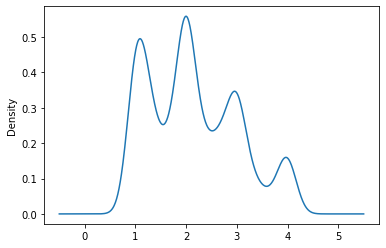

In [92]:
vote.vote.plot.kde()

<AxesSubplot:ylabel='Density'>

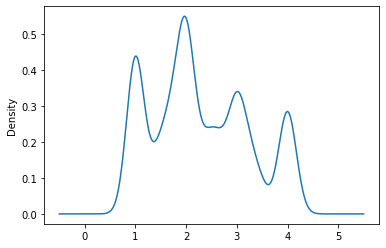

In [93]:
resultats_base.votefinal.plot.kde()

In [94]:
print(vote.vote.mean())

2.1448162968352045


In [95]:
print(resultats_base.votefinal.mean())

2.289541691903894


In [96]:
# resultat_final:
liste = list(vote.ligne.values)
resultat_final = resultats_base[['ligne','pair_id','pair_lang','votefinal']]
resultat_final.columns = ['ligne','pair_id','pair_lang','Overall']
for i in range(len(resultats_base)):
    if resultats_base.ligne[i] in liste:
        temp = vote[vote.ligne == resultats_base.ligne[i]].reset_index(drop=True)
        if len(temp)>1:
            print('problème à la ligne : ',resultats_base.ligne[i])
        else:
            resultat_final.loc[i,['Overall']] = temp.vote[0]

C:\Users\stg-sdu\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [97]:
resultat_final

,ligne,pair_id,pair_lang,Overall
0,0,1484189203_1484121193,en_en,4.0
1,1,1484011097_1484011106,en_en,1.0
2,2,1484039488_1484261803,en_en,4.0
3,3,1484332324_1484796748,en_en,1.6
4,4,1484012256_1484419682,en_en,3.5
...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,2.1
4949,4949,1646957948_1643667075,es_it,2.9
4950,4950,1504063453_1502866628,es_it,2.4
4951,4951,1647862428_1647712939,es_it,1.2


2.21825156470827


<AxesSubplot:ylabel='Density'>

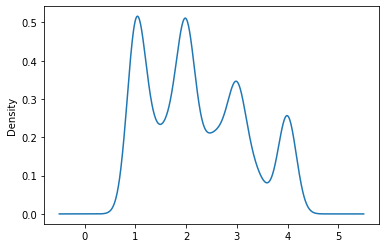

In [98]:
print(resultat_final.Overall.mean())
resultat_final.Overall.plot.kde()

In [99]:
#resultat_final.loc[:,['pair_id','Overall']].to_csv('Evaluation_task8_compromis_base_google_non_scaled.csv',index=False)
resultat_final.loc[:,['pair_id','Overall']].to_csv('Evaluation_task8_compromis_base_google_non_scaled_geography.csv',index=False)

In [100]:
resultat_final.Overall.value_counts()

1.0    951
2.0    817
4.0    537
3.0    528
1.2    252
1.8    160
1.5    123
1.6    119
2.5    118
2.6    117
2.2    114
2.8    111
1.7    100
2.4     99
2.7     97
1.4     84
3.4     77
3.2     76
1.9     74
3.3     65
1.3     56
2.3     54
3.1     53
2.1     39
3.8     38
3.5     35
2.9     34
3.6     19
3.7      5
1.1      1
Name: Overall, dtype: int64

**Programme avec scaling**

In [101]:
resultats_base2,resultats_google2 = fonction_resultats(scaling = True, geography_score=True)

 partie traitée : français
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'meth1_similarites', 'meth2_similarites', 'score_geography_max', 'score_geography_mean']
-------------------------
 partie traitée : turc
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'meth1_similarites', 'meth2_similarites', 'score_geography_max', 'score_geography_mean']
-------------------------
 partie traitée : anglais
['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1', 'score_similarite_resume2', 'score_classif1', 'score_classif2', 'score_sentiment1', 'score_sentiment2', 'score_sentiment3', 'meth1_similarites', 'meth2_similar

In [111]:
resultats_base2

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,0,1484189203_1484121193,en_en,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.680279,3.675718,3.546333,3.63,4.0
1,1,1484011097_1484011106,en_en,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.040366,1.145180,1.375500,1.19,1.0
2,2,1484039488_1484261803,en_en,4.0,0.0,0.0,0.0,6.0,4.0,4.00,4.070320,4.072357,3.996667,4.05,4.0
3,3,1484332324_1484796748,en_en,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.825657,1.863539,1.616667,1.77,1.6
4,4,1484012256_1484419682,en_en,3.0,0.0,0.0,2.0,4.0,4.0,3.67,3.289883,3.418450,3.356667,3.35,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.296026,3.127400,3.105000,3.18,3.1
4949,4949,1646957948_1643667075,es_it,1.0,2.0,4.0,0.0,0.0,2.0,1.67,2.019952,1.528480,2.030000,1.86,2.0
4950,4950,1504063453_1502866628,es_it,4.0,0.0,0.0,0.0,6.0,4.0,4.00,2.957714,3.071891,3.445000,3.16,3.4
4951,4951,1647862428_1647712939,es_it,2.0,0.0,6.0,0.0,0.0,2.0,2.00,2.374989,2.441530,1.797500,2.20,2.0


In [102]:
resultats_base3 = resultats_base2.loc[:,['pair_id','votefinal']]
resultats_base3.columns = ['pair_id','Overall']
#resultats_base3.to_csv('Evaluation_task8_Base_toutes_langues_scaled.csv',index=False)
resultats_base3.to_csv('Evaluation_task8_Base_toutes_langues_scaled_geography.csv',index=False)

In [103]:
comparaison2 = resultats_google2.merge(resultats_base2[['ligne','votefinal']],left_on = 'ligne',right_on = 'ligne')

In [104]:
comparaison2.columns = ['ligne', 'pair_id', 'pair_lang', 'RF', 'val1', 'val2', 'val3', 'val4','valfinale', 'stacking', 'LR', 'PLS', 'ETR', 'regression','votefinal_google','votefinal_base']

In [112]:
resultat_final_google2 = resultats_google2.copy()
liste_google = list(resultats_google2.ligne.values)
lignes_ajout = []
for i in range(len(resultats_base2)):
     if resultats_base2.ligne[i] not in liste_google:
        lignes_ajout.append(i)
resultat_final_google2 = pd.concat([resultat_final_google2,resultats_base2.loc[lignes_ajout,:]],axis=0)
resultat_final_google2 = resultat_final_google2.sort_values(by=['ligne']).reset_index(drop=True)

In [113]:
vote2,resultat_final_google2 = choix_google_base(comparaison2,resultat_final_google2)

Ecarts >= 2 : 42
Ecarts 1 à 2 : 480
Ecarts 0.5 à 1 : 499
Ecarts faibles : 1734
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Ecart > 1 AVEC changement pour valeur base
Titres ou textes courts - ligne  173  - Ecart  0.4
Titres ou textes courts - ligne  176  - Ecart  0.2
Exception Google - ligne :  189  - Ecart  0.0
Exception Google - ligne :  194  - Ecart  0.0
Exception Google - ligne :  199  - Ecart  0.5
Exception Google - ligne :  214  - Ecart  0.0
Exception Google - ligne :  218  - Ecart  0.0
Exception Google - ligne :  221  - Ecart  0.0
Exception Google - ligne :  224  - Ecart  0.0
Exception Google - ligne :  225  - Ecart  0.0
Exception Google - ligne :  229  - Ecart  0.0
Exception Google - ligne :  231  - Ecart  0.0
Exception Google - ligne :  233  - Ecart  0.0
Exception Google - ligne :  236  - Ecart  0.0
Exception Google - ligne :  241  - Ecart  0.1
Except

In [114]:
resultat_final_google2

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,0,1484189203_1484121193,en_en,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.680279,3.675718,3.546333,3.63,4.0
1,1,1484011097_1484011106,en_en,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.040366,1.145180,1.375500,1.19,1.0
2,2,1484039488_1484261803,en_en,4.0,0.0,0.0,0.0,6.0,4.0,4.00,4.070320,4.072357,3.996667,4.05,4.0
3,3,1484332324_1484796748,en_en,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.825657,1.863539,1.616667,1.77,1.6
4,4,1484012256_1484419682,en_en,3.0,0.0,0.0,2.0,4.0,4.0,3.67,3.289883,3.418450,3.356667,3.35,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,4.0,0.0,4.0,1.0,1.0,2.0,2.50,2.415527,2.571602,1.720000,2.24,2.0
4949,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,4.0,4.0,3.67,2.995460,2.952239,3.152333,3.03,3.2
4950,4950,1504063453_1502866628,es_it,2.0,0.0,6.0,0.0,0.0,2.0,2.00,2.243042,2.318512,2.092500,2.22,2.0
4951,4951,1647862428_1647712939,es_it,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.065575,1.365172,1.103333,1.18,1.0


In [115]:
resultat_final_google2 = resultat_final_google2[['pair_id','votefinal']]
resultat_final_google2.columns = ['pair_id','Overall']
#resultat_final_google2.to_csv('Evaluation_task8_Google_en_scaled.csv',index=False)
resultat_final_google2.to_csv('Evaluation_task8_Google_en_scaled_geography.csv',index=False)

In [116]:
vote2

,ligne,pair_id,pair_lang,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal_google,votefinal_base,vote
0,62,1484202408_1484046875,de_de,4.0,0.0,0.0,0.0,6.0,4.0,4.00,4.031060,3.987695,3.880417,3.97,4.0,3.6,4.0
1,63,1483964349_1484064408,de_de,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.973873,3.869369,3.964167,3.94,4.0,4.0,4.0
2,64,1484205524_1484160345,es_es,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.682105,3.725949,3.586667,3.66,4.0,4.0,4.0
3,65,1484115617_1483987297,es_es,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.837449,3.408540,3.700833,3.65,4.0,2.7,2.7
4,66,1484230421_1484172459,es_es,4.0,0.0,0.0,0.0,6.0,4.0,4.00,3.606860,3.752315,3.579833,3.65,4.0,3.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,4948,1553907621_1553488848,es_it,4.0,0.0,4.0,1.0,1.0,2.0,2.50,2.415527,2.571602,1.720000,2.24,2.0,3.1,2.3
2745,4949,1646957948_1643667075,es_it,3.0,0.0,0.0,2.0,4.0,4.0,3.67,2.995460,2.952239,3.152333,3.03,3.2,2.0,2.9
2746,4950,1504063453_1502866628,es_it,2.0,0.0,6.0,0.0,0.0,2.0,2.00,2.243042,2.318512,2.092500,2.22,2.0,3.4,2.4
2747,4951,1647862428_1647712939,es_it,1.0,6.0,0.0,0.0,0.0,1.0,1.00,1.065575,1.365172,1.103333,1.18,1.0,2.0,1.2


In [117]:
liste2 = list(vote2.ligne.values)
resultat_final2 = resultats_base2[['ligne','pair_id','pair_lang','votefinal']]
resultat_final2.columns = ['ligne','pair_id','pair_lang','Overall']
for i in range(len(resultats_base2)):
    if resultats_base2.ligne[i] in liste2:
        temp = vote2[vote2.ligne == resultats_base2.ligne[i]].reset_index(drop=True)
        if len(temp)>1:
            print('problème à la ligne : ',resultats_base2.ligne[i])
        else:
            resultat_final2.loc[i,['Overall']] = temp.vote[0]

C:\Users\stg-sdu\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [118]:
resultat_final2

,ligne,pair_id,pair_lang,Overall
0,0,1484189203_1484121193,en_en,4.0
1,1,1484011097_1484011106,en_en,1.0
2,2,1484039488_1484261803,en_en,4.0
3,3,1484332324_1484796748,en_en,1.6
4,4,1484012256_1484419682,en_en,3.4
...,...,...,...,...
4948,4948,1553907621_1553488848,es_it,2.3
4949,4949,1646957948_1643667075,es_it,2.9
4950,4950,1504063453_1502866628,es_it,2.4
4951,4951,1647862428_1647712939,es_it,1.2


In [119]:
#resultat_final2.loc[:,['pair_id','Overall']].to_csv('Evaluation_task8_compromis_base_google_scaled.csv',index=False)
resultat_final2.loc[:,['pair_id','Overall']].to_csv('Evaluation_task8_compromis_base_google_scaled_geography.csv',index=False)

**Tests Resultats**

In [47]:
Xtrain1 = spanish[predicteurs].reset_index(drop=True)
ytrain1 = spanish['Overall'].reset_index(drop=True)

In [19]:
Xtrain1 = anglais[predicteurs_anglais].reset_index(drop=True)
ytrain1 = anglais['Overall'].reset_index(drop=True)
Xtrain2 = francais[predicteurs].reset_index(drop=True)
ytrain2 = francais['Overall'].reset_index(drop=True)
Xtrain3 = turc[predicteurs].reset_index(drop=True)
ytrain3 = turc['Overall'].reset_index(drop=True)
Xtrain4 = allemand[predicteurs_anglais].reset_index(drop=True)
ytrain4 = allemand['Overall'].reset_index(drop=True)

In [20]:
Xtest1 = final_anglais[predicteurs_anglais].reset_index(drop=True)
Xtest2 = final_francais[predicteurs].reset_index(drop=True)
Xtest3 = final_turc[predicteurs].reset_index(drop=True)
Xtest4 = final_allemand[predicteurs_anglais].reset_index(drop=True)
Xtest5 = autres_langues[predicteurs_anglais].reset_index(drop=True)

In [22]:
# VOIR SI SCALE THE DATA !!!
Xtrain1_sc = sc.fit_transform(Xtrain1)
Xtest1_sc = sc.transform(Xtest1)

In [48]:
rf.fit(Xtrain1,ytrain1)
lda.fit(Xtrain1,ytrain1)
#logreg.fit(Xtrain1_sc,ytrain1)

LinearDiscriminantAnalysis()

In [27]:
res_rf = rf.predict(Xtest1)
res_lda = lda.predict(Xtest1)
# res_logreg = lr.predict(Xtest)
res_final = pd.concat([pd.DataFrame(res_rf,columns = ['RF']),pd.DataFrame(res_lda,columns = ['LDA'])],axis=1)

In [32]:
res_rf2 = around(rf.predict_proba(Xtest1)*100, decimals=2)
res_lda2 = around(lda.predict_proba(Xtest1)*100, decimals=2)
# res_logreg2 = around(logreg.predict_proba(Xtest)*100, decimals=2)
liste_rf = choix_classes(res_rf2)
liste_lda = choix_classes(res_lda2)
# liste_logreg = choix_classes(res_logreg2)
res_final = pd.concat([res_final,pd.DataFrame(liste_lda,columns = ['LDA_Prob']),pd.DataFrame(liste_rf,columns = ['RF_Prob'])],axis=1)

In [33]:
res_final['stacking'] = round((res_final['RF'] + res_final['RF_Prob'] + res_final['LDA'] + res_final['LDA_Prob'] )/4,2)
#            + res_final['LOGR'] + res_final['LOGR_Prob'])/6,2)
res_final

,RF,LDA,LDA_Prob,RF_Prob,stacking
0,4,4,4,4,4.00
1,1,1,1,1,1.00
2,4,4,4,4,4.00
3,1,1,1,1,1.00
4,3,4,4,3,3.50
...,...,...,...,...,...
2786,2,2,2,3,2.25
2787,1,1,1,1,1.00
2788,4,3,3,3,3.25
2789,4,4,4,4,4.00


In [34]:
res_final2 = decompte(res_final)

In [35]:
res_final2

,RF,val1,val2,val3,val4,valfinale,stacking
0,4.0,0.0,0.0,0.0,4.0,4.000000,4.00
1,1.0,4.0,0.0,0.0,0.0,1.000000,1.00
2,4.0,0.0,0.0,0.0,4.0,4.000000,4.00
3,1.0,4.0,0.0,0.0,0.0,1.000000,1.00
4,3.0,0.0,0.0,1.0,2.0,3.666667,3.50
...,...,...,...,...,...,...,...
2786,2.0,0.0,2.0,1.0,0.0,2.333333,2.25
2787,1.0,4.0,0.0,0.0,0.0,1.000000,1.00
2788,4.0,0.0,0.0,3.0,0.0,3.000000,3.25
2789,4.0,0.0,0.0,0.0,4.0,4.000000,4.00


## REGRESSION Sklearn Pycaret

In [37]:
lr.fit(Xtrain1,ytrain1)
pls.fit(Xtrain1,ytrain1)
etr.fit(Xtrain1,ytrain1)

ExtraTreesRegressor()

In [38]:
res_lr = lr.predict(Xtest1)
res_pls = pls.predict(Xtest1)
res_etr = etr.predict(Xtest1)
res_final2 = pd.concat([res_final2,pd.DataFrame(res_lr,columns = ['LR']),pd.DataFrame(res_pls,columns = ['PLS']),pd.DataFrame(res_etr,columns = ['ETR'])],axis=1)

In [39]:
res_final2['regression'] = round((res_final2['LR'] + res_final2['PLS'] + res_final2['ETR'])/3,2)

In [40]:
res_final2 

,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression
0,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.733575,3.854355,3.570,3.72
1,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.038629,1.109303,1.430,1.19
2,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,4.096188,4.084769,4.000,4.06
3,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.780155,1.841885,1.470,1.70
4,3.0,0.0,0.0,1.0,2.0,3.666667,3.50,3.301209,3.433627,3.540,3.42
...,...,...,...,...,...,...,...,...,...,...,...
2786,2.0,0.0,2.0,1.0,0.0,2.333333,2.25,2.543130,2.522998,2.680,2.58
2787,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,0.939469,0.981580,1.060,0.99
2788,4.0,0.0,0.0,3.0,0.0,3.000000,3.25,3.003240,2.881151,3.010,2.96
2789,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.504616,3.583090,3.705,3.60


In [41]:
res_final2['votefinal'] = res_final2.ETR

In [42]:
res_final2

,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.733575,3.854355,3.570,3.72,3.570
1,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.038629,1.109303,1.430,1.19,1.430
2,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,4.096188,4.084769,4.000,4.06,4.000
3,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.780155,1.841885,1.470,1.70,1.470
4,3.0,0.0,0.0,1.0,2.0,3.666667,3.50,3.301209,3.433627,3.540,3.42,3.540
...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2.0,0.0,2.0,1.0,0.0,2.333333,2.25,2.543130,2.522998,2.680,2.58,2.680
2787,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,0.939469,0.981580,1.060,0.99,1.060
2788,4.0,0.0,0.0,3.0,0.0,3.000000,3.25,3.003240,2.881151,3.010,2.96,3.010
2789,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.504616,3.583090,3.705,3.60,3.705


In [43]:
res_final3 = res_final2.copy()

In [46]:
finalisation_note(res_final3)

,RF,val1,val2,val3,val4,valfinale,stacking,LR,PLS,ETR,regression,votefinal
0,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.733575,3.854355,3.570,3.72,4.0
1,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.038629,1.109303,1.430,1.19,1.0
2,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,4.096188,4.084769,4.000,4.06,4.0
3,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,1.780155,1.841885,1.470,1.70,1.5
4,3.0,0.0,0.0,1.0,2.0,3.666667,3.50,3.301209,3.433627,3.540,3.42,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2.0,0.0,2.0,1.0,0.0,2.333333,2.25,2.543130,2.522998,2.680,2.58,2.7
2787,1.0,4.0,0.0,0.0,0.0,1.000000,1.00,0.939469,0.981580,1.060,0.99,1.0
2788,4.0,0.0,0.0,3.0,0.0,3.000000,3.25,3.003240,2.881151,3.010,2.96,3.0
2789,4.0,0.0,0.0,0.0,4.0,4.000000,4.00,3.504616,3.583090,3.705,3.60,4.0


In [ ]:
# res_final3 = pd.concat([final_turc.ligne,res_final3],axis=1)
# res_final3 = pd.concat([final_francais.ligne,res_final3],axis=1)
# res_final3 = pd.concat([final_allemand.ligne,res_final3],axis=1)

In [172]:
# res_final3

,ligne,RF,val1,val2,val3,val4,valfinale,LR,PLS,ETR,regression,votefinal
0,507,4,0,0,0,4,4,3.760762,3.739041,3.830,3.78,4.0
1,2514,1,4,0,0,0,1,1.280403,1.410915,1.430,1.37,1.0
2,2515,1,4,0,0,0,1,-0.391842,-0.407061,1.260,0.15,1.0
3,2516,2,0,4,0,0,2,1.937750,2.006188,1.865,1.94,2.0
4,2517,2,2,1,0,0,1.33333,2.338491,2.282057,2.020,2.21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,4092,2,0,4,0,0,2,2.251676,2.229326,2.135,2.21,2.0
118,4093,2,0,4,0,0,2,2.254768,2.103213,2.485,2.28,2.5
119,4094,4,0,0,0,4,4,3.995752,3.986608,3.510,3.83,4.0
120,4095,4,0,0,0,4,4,3.258759,3.275964,3.540,3.36,3.5


In [176]:
#sub_turc = data.loc[data.pair_lang == 'tr_tr',['ligne','pair_id']].reset_index(drop=True)
sub_french = data.loc[data.pair_lang == 'fr_fr',['ligne','pair_id']].reset_index(drop=True)
#sub_allemand = data.loc[(data.pair_lang == 'de_de')|(data.pair_lang == 'de_pl')|(data.pair_lang == 'de_fr'),
#                        ['ligne','pair_id']].reset_index(drop=True)

In [177]:
sub_french

,ligne,pair_id
0,507,1625412975_1638524563
1,2514,1558970444_1558964991
2,2515,1500726377_1505304686
3,2516,1647323324_1647931569
4,2517,1587759761_1585896903
...,...,...
106,2619,1516068044_1617822308
107,2620,1514661055_1508796560
108,2621,1631999222_1624257048
109,2622,1528931736_1555547266


In [178]:
res_final3 = res_final3.merge(sub_french,left_on = 'ligne',right_on = 'ligne')

In [179]:
res_final3

,ligne,RF,val1,val2,val3,val4,valfinale,LR,PLS,ETR,regression,votefinal,pair_id
0,507,4,0,0,0,4,4,3.760762,3.739041,3.830,3.78,4.0,1625412975_1638524563
1,2514,1,4,0,0,0,1,1.280403,1.410915,1.430,1.37,1.0,1558970444_1558964991
2,2515,1,4,0,0,0,1,-0.391842,-0.407061,1.260,0.15,1.0,1500726377_1505304686
3,2516,2,0,4,0,0,2,1.937750,2.006188,1.865,1.94,2.0,1647323324_1647931569
4,2517,2,2,1,0,0,1.33333,2.338491,2.282057,2.020,2.21,2.0,1587759761_1585896903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2619,2,0,4,0,0,2,1.296992,1.344784,1.760,1.47,2.0,1516068044_1617822308
107,2620,1,4,0,0,0,1,1.336372,1.343705,1.300,1.33,1.0,1514661055_1508796560
108,2621,4,0,0,0,4,4,3.503524,3.463960,3.360,3.44,3.4,1631999222_1624257048
109,2622,2,2,1,0,0,1.33333,1.654326,1.705891,1.910,1.76,1.9,1528931736_1555547266


In [180]:
#res_final3.to_csv('results_french.csv')